[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HSinger04/VOGUE-Reimplementation/blob/main/cryu854/Image2Latent.ipynb)

In [1]:
%cd /content
!git clone https://github.com/HSinger04/VOGUE-Reimplementation

/content
Cloning into 'VOGUE-Reimplementation'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 441 (delta 90), reused 0 (delta 0), pack-reused 303
Receiving objects: 100% (441/441), 83.85 MiB | 47.49 MiB/s, done.
Resolving deltas: 100% (256/256), done.


In [2]:
%cd /content/VOGUE-Reimplementation/cryu854/

/content/VOGUE-Reimplementation/cryu854


## Mount drive for dataset and weights

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Imports

In [8]:
import tensorflow as tf
import os

## Load data

In [21]:
# Pro: Save space in google drive
# Contra: Needs to load the whole dataset every time
# use list_files to get generate dataset from data in different subdirectories easily
data = tf.data.Dataset.list_files("/content/drive/MyDrive/Lernen/Coxi/IANNwTF/ffhq-dataset/images1024x1024/" 
                                  + "[0-9]" * 5
                                  + "/*.png")

## Convert paths to images

In [26]:
def decode_ffhq(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    return img

# TODO: Convert to appropriate dtype
data = data.map(decode_ffhq)

# TODO: Some better image stuff

# Loading trained model

## Actually load the model

In [27]:
!git pull
import tensorflow as tf
from modules.generator import generator

resolution = 1024  
config = "f"
num_labels = 0
checkpoint_path = "/content/drive/MyDrive/Lernen/Coxi/IANNwTF/official_1024x1024/"

Gs = generator(resolution, num_labels, config, randomize_noise=False)
ckpt = tf.train.Checkpoint(generator_clone=Gs)
print(f'Loading network from {checkpoint_path}...')
ckpt.restore(tf.train.latest_checkpoint(checkpoint_path)).expect_partial()

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/HSinger04/VOGUE-Reimplementation
   41e0db9..8c9336e  main       -> origin/main
Updating 41e0db9..8c9336e
Fast-forward
 cryu854/modules/generator.py | 14 +++++++-------
 1 file changed, 7 insertions(+), 7 deletions(-)
Loading network from /content/drive/MyDrive/Lernen/Coxi/IANNwTF/official_1024x1024/...


## Train model

Layers & models also feature a boolean attribute trainable. Its value can be changed. Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable.

In [30]:
truncation_psi = 0.5
batch_size = 5
latents = tf.random.normal([batch_size, 512])
# TODO: from _get_labels
labels_indice = [0]*batch_size
labels = tf.zeros([batch_size, 0], tf.float32)
images = Gs([latents, labels], truncation_psi=truncation_psi, training=False)

In [40]:
print(images.dtype)
print(images[0])
print(tf.math.reduce_min(images[0]))
print(tf.math.reduce_max(images[0]))

float32
[[[ 0.58100164  0.56317496  0.48006675]
  [ 0.6932222   0.6529224   0.59214133]
  [ 0.7105239   0.67630816  0.6258056 ]
  ...
  [ 0.90761197  0.8286724   0.77261096]
  [ 0.84834224  0.7672942   0.7236549 ]
  [ 0.6825547   0.60623795  0.58646536]]

 [[ 0.73506945  0.68388623  0.5805054 ]
  [ 0.73884374  0.67777246  0.61722314]
  [ 0.73746717  0.6730734   0.60846937]
  ...
  [ 0.87027806  0.8079827   0.7349522 ]
  [ 0.85728616  0.77200925  0.71914536]
  [ 0.8410201   0.75686413  0.7209343 ]]

 [[ 0.74364674  0.70840853  0.6120038 ]
  [ 0.7252759   0.6784191   0.6157586 ]
  [ 0.73957086  0.6846648   0.61089224]
  ...
  [ 0.86963487  0.82182944  0.757177  ]
  [ 0.86667216  0.8136996   0.74940354]
  [ 0.86340654  0.817599    0.76285034]]

 ...

 [[ 0.0390899  -0.18620399 -0.11875823]
  [-0.00316273 -0.19027689 -0.18387869]
  [ 0.00599138 -0.17826511 -0.19495377]
  ...
  [ 0.21313395  0.0938196   0.0135164 ]
  [ 0.2474589   0.13685194  0.02878019]
  [ 0.23032537  0.11741771  0.012113

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


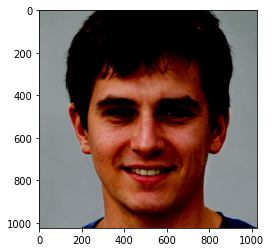

In [42]:
from matplotlib import pyplot as plt

# TODO: proper image displaying
for i in range(batch_size):
    plt.imshow(images[i])